# <center> Punto 4 Inventarios de Optiobras <center>

In [27]:
import pulp  as lp#resolver problemas prog. lin.
import pandas as pd # archivos, tablas
import numpy as np  # numéricas
from IPython.display import display
from IPython.display import Image

## a) Diagrama

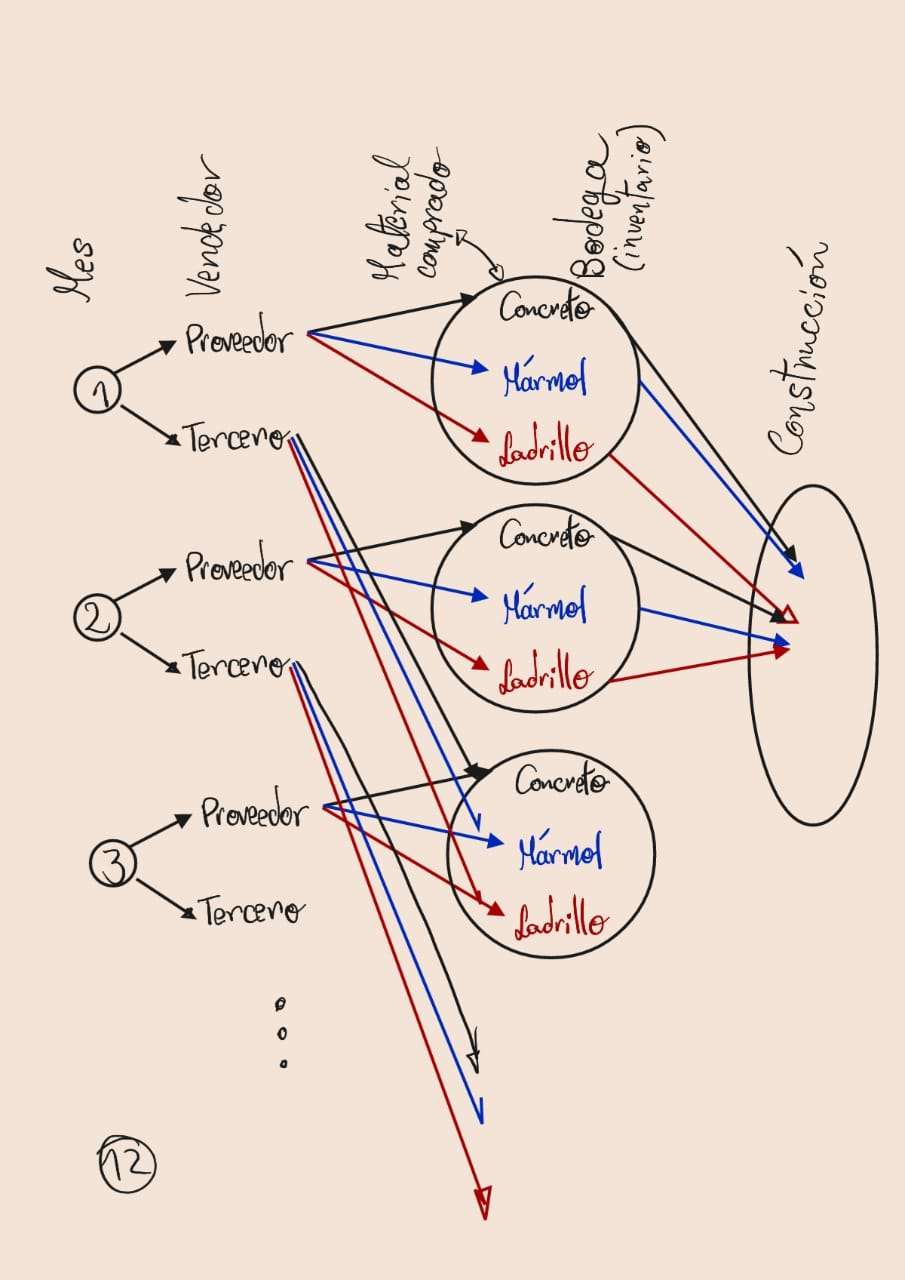

In [28]:

Image(filename="./img4.jpeg")

## b)
## i) Conjuntos 
$$ Meses  =\{ \text{1,2,...,12}\} $$
$$ \text{Procedencia del material} =\{ \text{Proveedor, Tercero, Bodega}\} $$
$$ Materiales=\{ \text{Concreto, Mármol, Ladrillo}\} $$
Índices:

Meses: $$I=\{0,...,11\} $$
Procedencia del material: $$J=\{0,1,2\} $$
Materiales: $$k=\{0,1,2\} $$


In [2]:
materiales={0:"Concreto",1: "Mármol",2: "Ladrillo" }
meses=range(12) #0 hasta 11

print(materiales)
print(meses)

{0: 'Concreto', 1: 'Mármol', 2: 'Ladrillo'}
range(0, 12)



## ii) parámetros 
Costo unitario de compra al proveedor por mes y material (COP / kg):$$C_{ij}$$
Requerimientos de construcción por mes y material (kg): $$R_{ij}$$
Costos por kilogramo del tercero: $$T_{j}$$
Máximo de envío del proveedor por mes: $$P_{j}$$
Capacidad Total de la bodega para cualquier tipo de material: $$total=6000$$
Cantidades mínimas que debe haber al final de cada mes: $$I_j$$
Costo del material en el inventario de bodega: $$C_0=\$780$$


In [3]:
print("costo_unitario_proveedor")
#Filas:mes; columnas: Concreto,Mármol,ladrillo
Cp=((4156,52300,4877),
(4178,71610,2906),
(4930,85120,4117),
(3406,82070,4841),
(5581,51600,3415),
(4429,89830,4911),
(3779,52900,5436),
(5377,98440,3212),
(5066,52959,5187),
(8391,55570,3076),
(4354,55730,3227),
(4220,81980,3166)
 )
for row in Cp:
    for cp in row:
        print(f'{cp} ',end='')
    print('')
print("requerimientos de construccion")
#Mes,Concrete,Marble,Brick
R=((1271,2100,3958),
(1562,6900,4928),
(2828,2600,6773),
(5530,1600,9873),
(3455,2000,14983),
(7400,7190,25900),
(5832,7600,29389),
(2377,8200,37896),
(3709,13000,33291),
(2057,27000,35465),
(1476,10000,29300),
(1170,5000,25489)
)
for row in R:
    for r in row:
        print(f'{r} ',end='')
    print('')
print("Costo Unitario del Tercero")
# CT=
CT=[(6000,97500,6900) for i in range(12)]
# print(CT)
for i in CT:
    print(i)
#"Máximo de Material del proveedor"
print("Máximo de Material del proveedor")
M=[(3500,7000,10000) for i in range(12)]
for i in M:
    print(i)
#"Capacidad total de la Bodega"
print("Capacidad total de la Bodega")
B=6000
#"Costo del material en el invetario/bodega"
print("Costo del material en el inventario")
c_inv=780
print(c_inv)
# "Cantidades mínimas del inventario"
print("Cantidades mínimas del inventario")
m=[(830,2000,1200) for i in range(12)]
for i in m:
    print(i)

costo_unitario_proveedor
4156 52300 4877 
4178 71610 2906 
4930 85120 4117 
3406 82070 4841 
5581 51600 3415 
4429 89830 4911 
3779 52900 5436 
5377 98440 3212 
5066 52959 5187 
8391 55570 3076 
4354 55730 3227 
4220 81980 3166 
requerimientos de construccion
1271 2100 3958 
1562 6900 4928 
2828 2600 6773 
5530 1600 9873 
3455 2000 14983 
7400 7190 25900 
5832 7600 29389 
2377 8200 37896 
3709 13000 33291 
2057 27000 35465 
1476 10000 29300 
1170 5000 25489 
Costo Unitario del Tercero
(6000, 97500, 6900)
(6000, 97500, 6900)
(6000, 97500, 6900)
(6000, 97500, 6900)
(6000, 97500, 6900)
(6000, 97500, 6900)
(6000, 97500, 6900)
(6000, 97500, 6900)
(6000, 97500, 6900)
(6000, 97500, 6900)
(6000, 97500, 6900)
(6000, 97500, 6900)
Máximo de Material del proveedor
(3500, 7000, 10000)
(3500, 7000, 10000)
(3500, 7000, 10000)
(3500, 7000, 10000)
(3500, 7000, 10000)
(3500, 7000, 10000)
(3500, 7000, 10000)
(3500, 7000, 10000)
(3500, 7000, 10000)
(3500, 7000, 10000)
(3500, 7000, 10000)
(3500, 7000, 1000



## iii) variables de decisión:

Requerimiento en kilogramos de cada tipo de material por cada mes proveniente del proveedor: $x_{\text {ij}}$

Requerimiento en kilogramos de cada tipo de material por cada mes proveniente del tercero: $y_{\text {ij}}$

Requerimiento en kilogramos de cada tipo de material por cada mes en bodega: $z_{\text {ij}}$


In [4]:
# Para esto primro se crea el programa 
prob=lp.LpProblem("optiobras",lp.LpMinimize)
#Variable3s de decisión
X=lp.LpVariable.dicts("Material Proveedor",((i,j) for i in meses for j in materiales), lowBound=0)
Y=lp.LpVariable.dicts("Material Tercero",((i,j) for i in meses for j in materiales), lowBound=0)
Z=lp.LpVariable.dicts("Material Bodega",((i,j) for i in meses for j in materiales), lowBound=0)

## iv) Función Objetivo:

Minimizar Costo total:

$$ \sum_{i\in I}\sum_{j\in J} C_{ij}X_{ij}+T_jY_{ij}+C_{0}Z_{ij}$$

In [5]:
#Función Objetivo
#sum_i_j cp_ij*x_ij+ct_j*y_ij+c*z_ij
######
prob+=lp.lpSum([Cp[i][j]*X[(i,j)]+CT[i][j]*Y[(i,j)]+c_inv*Z[(i,j)] for i in meses for j in materiales])
######
# Si deseamos mirar la existencia de un conjunto factible (feasible) cambiamos la función objetivo a 0:
# prob+=0
#####

## v) Restricciones:

El proveedor ha comunicado las cantidades máximas que puede enviar de cada tipo de
material al mes:
$$x_{ij}<=P_j$$


In [6]:
#Restricción max proveedor
for i in meses:
    for j in materiales:
        prob+=X[(i,j)]<=M[i][j]


La bodega de almacenamiento tiene una
capacidad total de 6,000 kg para cualquier tipo de material:
$$z_{ij}<=total$$

In [7]:
for i in meses:
    for j in materiales:
        prob+=Z[(i,j)]<=B


Las cantidades mínimas que debe haber al finar de cada mes, en kilogramos, son: 830 de concreto, 2,000
de mármol y 1,200 de ladrillo. 

$$x_{ij}+y_{i-3,j}+z_{ij}>=I_j$$


In [8]:
for j in materiales: # no hay tercer proveedor entre meses 0 y 2
    prob+=X[(0,j)]+Z[(0,j)]>=m[0][j]
    prob+=X[(1,j)]+Z[(1,j)]>=m[1][j]
    prob+=X[(2,j)]+Z[(2,j)]>=m[2][j]
for i in meses[3:-1]:
    for j in materiales:
        prob+=X[(i,j)]+Y[(i-3,j)]+Z[(i,j)]>=m[i][j]


Optiobras cuenta únicamente con un inventario en bodega de 3,500
kilogramos de concreto y 2,200 kilogramos de mármol:

$$z_{00}=3500$$
$$z_{00}=2200$$
$$z_{00}=0$$

In [9]:
#Inventario actual:
prob+=Z[(0,0)]==3500
prob+=Z[(0,1)]==2200
prob+=Z[(0,2)]==0

El inventario de bodega en el mes siguiente es igual a lo que quedó en los meses anteriores

$$z_{i+1,j}=x_{ij}+y_{i-3,j}+z_{ij}-R_{ij}$$

In [10]:
for i in meses[:3]:
    for j in materiales:
        prob+=X[(i,j)]+Z[(i,j)]-R[i][j]==Z[(i+1,j)]
for i in meses[3:-1]:
    for j in materiales:
        prob+=X[(i,j)]+Y[(i-3,j)]+Z[(i,j)]-R[i][j]==Z[(i+1,j)]
for j in materiales:
    prob+=X[(11,j)]+Y[(11-3,j)]+Z[(11,j)]==R[11][j]

## c) Solución:

Resolvemos el problema planteado según como lo definimos previamente y aplicando la función solve() de PulP

In [11]:
# Resolución del problema
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/john/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/e740b919952e4b72a6500c6c13104db2-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/e740b919952e4b72a6500c6c13104db2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 149 COLUMNS
At line 555 RHS
At line 700 BOUNDS
At line 701 ENDATA
Problem MODEL has 144 rows, 108 columns and 297 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 39 (-105) rows, 55 (-53) columns and 122 (-175) elements
0  Obj 6.5799472e+09 Primal inf 118501.7 (39) Dual inf 106280 (3)
30  Obj 8.4547086e+09
Optimal - objective value 8.4547086e+09
After Postsolve, objective 8.4547086e+09, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 8454708630 - 30 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to al

1

Los kilogramos por cada tipo de material que se deberán solicitar tanto al proveedor como al tercero, de forma mensual irán en este orden:

In [23]:
# df = pd.DataFrame(X.varValue, columns=['Name', 'Age'])
X_tot=pd.DataFrame([[X[(i,j)].varValue for j in materiales ]for i in meses ], columns=list(materiales.values()))
Y_tot=pd.DataFrame([[Y[(i,j)].varValue for j in materiales ]for i in meses ], columns=list(materiales.values()))
Z_tot=pd.DataFrame([[Z[(i,j)].varValue for j in materiales ]for i in meses ], columns=list(materiales.values()))

In [24]:
display(X_tot)
display(Y_tot)

,Concreto,Mármol,Ladrillo
0,0.0,5900.0,3958.0
1,691.0,6100.0,10000.0
2,3500.0,0.0,7574.0
3,3500.0,0.0,10000.0
4,3455.0,7000.0,10000.0
5,3500.0,7000.0,10000.0
6,3500.0,7000.0,10000.0
7,2377.0,0.0,10000.0
8,3500.0,7000.0,10000.0
9,0.0,7000.0,10000.0


,Concreto,Mármol,Ladrillo
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,3900.0,0.0,14883.0
3,2332.0,0.0,19389.0
4,0.0,2990.0,27896.0
5,209.0,6000.0,23291.0
6,2057.0,20000.0,25465.0
7,0.0,3000.0,19300.0
8,0.0,0.0,15489.0
9,0.0,0.0,0.0


Las cantidades en bodega serán

In [25]:
display(Z_tot)

,Concreto,Mármol,Ladrillo
0,3500.0,2200.0,0.0
1,2229.0,6000.0,0.0
2,1358.0,5200.0,5072.0
3,2030.0,2600.0,5873.0
4,0.0,1000.0,6000.0
5,0.0,6000.0,1017.0
6,0.0,5810.0,0.0
7,0.0,5210.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


La Función Objetivo evaluada en los óptimos será:

In [26]:
print(f'C_min= ${lp.value(prob.objective)}')

C_min= $8454708630.0
